# SimpleRNN Test Code

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# I. SimpleRNN - without Normalization

> ## 1) Sample Data

In [3]:
# Inputs 데이터 생성(100, 5, 1)

X = [[[i + j] for i in range(5)] for j in range(100)]

X[:3], X[-3:]

([[[0], [1], [2], [3], [4]],
  [[1], [2], [3], [4], [5]],
  [[2], [3], [4], [5], [6]]],
 [[[97], [98], [99], [100], [101]],
  [[98], [99], [100], [101], [102]],
  [[99], [100], [101], [102], [103]]])

In [4]:
# Outputs 데이터 생성(100, 1)

y = [(i + 5) for i in range(100)]

y[:3], y[-3:]

([5, 6, 7], [102, 103, 104])

> ## 2) numpy_Array Casting

In [5]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

X.shape, y.shape

((100, 5, 1), (100,))

> ## 3) Train vs. Test Split

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((80, 5, 1), (80,), (20, 5, 1), (20,))

> ## 4) Keras SimpleRNN Modeling

### (1) Model Define & Summary
  * Unit(output_dim) : 3
  * input_shape(input_lenght, input_dim) : (5, 1)
  * return_sequences = False : 최종 Unit만 출력
  * layers.Dense(1) : y_hat


In [7]:
from keras import models, layers

model_1 = models.Sequential(name = 'SimpleRNN_1')
model_1.add(layers.SimpleRNN(3,
                             input_shape = (5, 1),
                             return_sequences = False))
model_1.add(layers.Dense(1))

model_1.summary()

Model: "SimpleRNN_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 3)                 15        
_________________________________________________________________
dense (Dense)                (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


### (2) Model Compile

In [8]:
model_1.compile(loss = 'mse',
                optimizer = 'adam',
                metrics = ['accuracy'])

### (3) Model Fit

In [9]:
Hist_1 = model_1.fit(X_train, y_train,
                     epochs = 100,
                     batch_size = 8,
                     validation_data = (X_test, y_test))

Epoch 1/100
10/10 [==============================] - 2s 68ms/step - loss: 4202.6967 - accuracy: 0.0000e+00 - val_loss: 3697.8481 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 3815.7552 - accuracy: 0.0000e+00 - val_loss: 3693.6079 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 3622.7668 - accuracy: 0.0000e+00 - val_loss: 3689.3835 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 3626.8277 - accuracy: 0.0000e+00 - val_loss: 3685.0500 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 3714.0778 - accuracy: 0.0000e+00 - val_loss: 3680.8071 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 3471.0977 - accuracy: 0.0000e+00 - val_loss: 3676.5325 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - lo

### (4) Model Predict

In [10]:
y_hat = model_1.predict(X_test)

### (5) 학습 결과 시각화

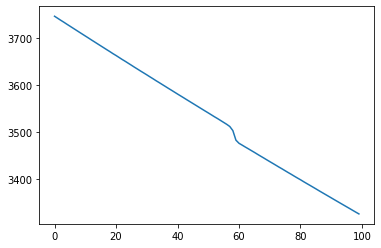

In [11]:
# Loss 감소
plt.plot(Hist_1.history['loss'])
plt.show()

* 학습 되지 않음
  * 녹색 -> 정답(y_test)
  * 적색 -> 예측(y_hat)


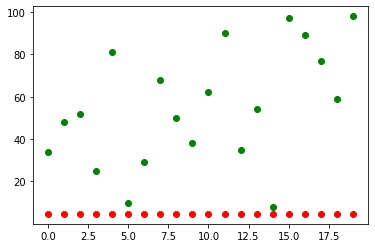

In [12]:
plt.scatter(range(20), y_hat, c = 'r')
plt.scatter(range(20), y_test, c = 'g')
plt.show()

# II. SimpleRNN - with Normalization

> ## 1) Sample Data - with Normalization

In [13]:
X = [[[(i + j)] for i in range(5)] for j in range(100)]
y = [(i + 5) for i in range(100)]

X = (X - np.min(X)) / (np.max(X) - np.min(X))
y = (y - np.min(y)) / (np.max(y) - np.min(y))

> ## 2) Casting

In [14]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

X.shape, y.shape


((100, 5, 1), (100,))

> ## 3) Train vs. Test Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 5, 1), (80,), (20, 5, 1), (20,))

> ## 4) Keras SimpleRNN Modeling

### (1) Model Define& Summary

*  None: input_length 자동 맞춤

In [16]:
model_2 = models.Sequential(name = 'SimpleRNN_2')

model_2.add(layers.SimpleRNN(3,
                             input_shape = (None, 1), 
                             return_sequences = False))
model_2.add(layers.Dense(1))

model_2.summary()


Model: "SimpleRNN_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 3)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


### (2) Model Compile

In [17]:
model_2.compile(loss = 'mse', 
                optimizer = 'adam', 
                metrics = ['accuracy'])


### (3) Model Fit

In [18]:
Hist_2 = model_2.fit(X_train, y_train, 
                     epochs = 100,
                     batch_size = 8,
                     validation_data = (X_test, y_test))

Epoch 1/100
10/10 [==============================] - 1s 48ms/step - loss: 0.6426 - accuracy: 0.0174 - val_loss: 0.4717 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4697 - accuracy: 0.0035 - val_loss: 0.3526 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.3350 - accuracy: 0.0085 - val_loss: 0.2590 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.2210 - accuracy: 0.0023 - val_loss: 0.1876 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.1731 - accuracy: 0.0107 - val_loss: 0.1351 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.1254 - accuracy: 0.0174 - val_loss: 0.0999 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.1167 - accuracy: 0.0066 - val_loss: 0.0777 - val_accur

### (4) Model Predict

In [19]:
y_hat = model_2.predict(X_test)

### (5) 학습 결과 시각화

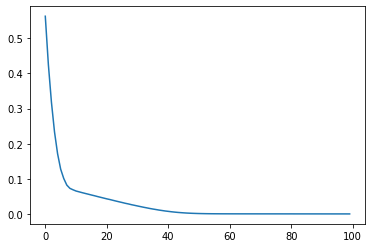

In [20]:
# Loss 감소
plt.plot(Hist_2.history['loss'])
plt.show()


* 학습 진행
  * 녹색 -> 정답(y_test)
  * 적색 -> 예측(y_hat)


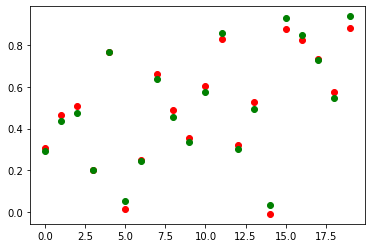

In [21]:
plt.scatter(range(20), y_hat, c = 'r')
plt.scatter(range(20), y_test, c = 'g')
plt.show()


# III. Stacked_SimpleRNN

> ## 1) Model Define & Summary

In [22]:
# return_sequences = True

model_4 = models.Sequential(name = 'Stackd_RNN')
model_4.add(layers.SimpleRNN(3,
                             input_shape = (None, 1), 
                             return_sequences = True))
model_4.add(layers.SimpleRNN(3,
                             input_shape = (None, 1),
                             return_sequences = False))
model_4.add(layers.Dense(1))

model_4.summary()


Model: "Stackd_RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, None, 3)           15        
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 3)                 21        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

In [23]:
model_4.compile(loss = 'mse', 
                optimizer = 'adam', 
                metrics = ['accuracy'])


> ## 3) Model Fit

In [24]:
Hist_4 = model_4.fit(X_train, y_train, 
                     epochs = 100,
                     batch_size = 8,
                     validation_data = (X_test, y_test))


Epoch 1/100
10/10 [==============================] - 2s 45ms/step - loss: 0.3372 - accuracy: 0.0050 - val_loss: 0.1581 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.1549 - accuracy: 0.0023 - val_loss: 0.0572 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0527 - accuracy: 0.0272 - val_loss: 0.0301 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0380 - accuracy: 0.0130 - val_loss: 0.0270 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0277 - accuracy: 0.0272 - val_loss: 0.0239 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0256 - accuracy: 0.0452 - val_loss: 0.0187 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0178 - accuracy: 0.0130 - val_loss: 0.0152 - val_accur

> ## 4) Model Predict

In [25]:
y_hat = model_4.predict(X_test)

> ## 5) 학습 결과 시각화

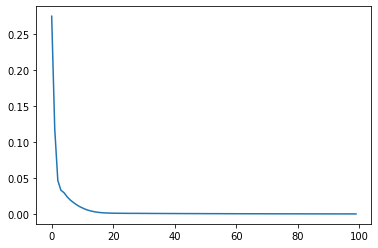

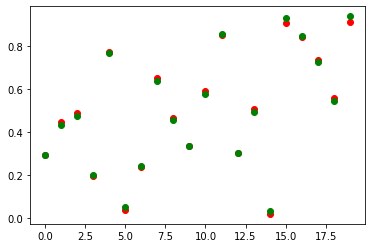

In [26]:
plt.plot(Hist_4.history['loss'])
plt.show()

plt.scatter(range(20), y_hat, c = 'r')
plt.scatter(range(20), y_test, c = 'g')
plt.show()


# IV. 'return_sequences' Output_Options

* 'input_length'에 대한 Sequnce 전체를 출력할지 설정
  * 'False' vs. 'True'

## 1) 실습데이터 생성

In [27]:
X = [[[i + j] for i in range(5)] for j in range(100)]
y = [i + 5 for i in range(100)]

X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 2045)

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((80, 5, 1), (80,), (20, 5, 1), (20,))

> ## 2) 테스트용 Input Data

In [28]:
X_test[0].reshape(1, 5, 1)


array([[[29.],
        [30.],
        [31.],
        [32.],
        [33.]]])

> ## 3) False_Option

In [29]:
# 마지막 Output만 출력
# Unit -> 1

Model_False = models.Sequential()
Model_False.add(layers.SimpleRNN(1,
                                 input_shape = (5, 1), 
                                 return_sequences = False))

Model_False.compile(loss = 'mse',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

Model_False.predict(X_test[0].reshape(1, 5, 1))



array([[1.]], dtype=float32)

In [30]:
# 마지막 Output만 출력
# Unit -> 3

Model_False = models.Sequential()
Model_False.add(layers.SimpleRNN(3,
                                 input_shape = (5, 1), 
                                 return_sequences = False))

Model_False.compile(loss = 'mse',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

Model_False.predict(X_test[0].reshape(1, 5, 1))


array([[-1.        , -0.99969846, -0.9999663 ]], dtype=float32)

> ## 4) True_Option

In [31]:
# 매 순환마다 Output 출력
# Unit -> 1
# input_length -> 5

Model_True = models.Sequential()
Model_True.add(layers.SimpleRNN(1,
                                input_shape = (5, 1), 
                                return_sequences = True))

Model_False.compile(loss = 'mse',
                    optimizer = 'adam',
                    metrics = ['accuracy'])

Model_True.predict(X_test[0].reshape(1, 5, 1))

array([[[-0.7393175 ],
        [-0.9379849 ],
        [-0.9605059 ],
        [-0.9645639 ],
        [-0.96703553]]], dtype=float32)

In [36]:
# 매 순환마다 Output만 출력
# Unit -> 3
# input_length -> 5

Model_True = models.Sequential()
Model_True.add(layers.SimpleRNN(3,
                                input_shape = (5, 1), 
                                return_sequences = True))

Model_True.compile(loss = 'mse',
                   optimizer = 'adam',
                   metrics = ['accuracy'])

Model_True.predict(X_test[0].reshape(1, 5, 1))


array([[[-1.,  1., -1.],
        [-1.,  1., -1.],
        [-1.,  1., -1.],
        [-1.,  1., -1.],
        [-1.,  1., -1.]]], dtype=float32)